<a href="https://colab.research.google.com/github/Uriel1201/HelloPython/blob/main/DiscreteShannon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Discrete Shannon Measure
The qualities of this formula "H" play a central role in information theory as measure of information, choice and uncertainty. This measure for example is the H in Boltzmann's famous H Theorem.

This quantity has some interesting properties:
> 1. When we are certain of the outcomes in a set of observations does H vanish, otherwise H is positive.
> 2. For a total of m possible results in a set of observations, H is maximum when all proportions of this possibilities are equal. This is also the most uncertain situation.
> 3. The uncertainty is never increased by experience. It will be decreased unless this experience is irrelevant (independent), in which case uncertainty is not changed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This exercise works according to the following:
> 1. A script is used to generate multiple sets of data.
> 2. The data is generated according to a Bernoulli distribution, where the parameter ( p ) is a particular value between 0 and 1.
> 3. After generating the data, the script roughly determines the uncertainty for each set.
> 4. Finally, the script generates a plot based on the data and uncertainty information.

In [2]:
def distBer(p):
    if p > 1 or p < 0:
        raise ValueError(f'p must represent a probability measure')
    ber = np.array([1.0 - p, 1.0])
    return ber

In [3]:
def sampling(dist):
     dist = np.array(dist)
     if dist[-1] != 1:
          raise ValueError(f'This array must represent a probability distribution')
     if np.any(dist < 0) or np.any(dist > 1):
          raise ValueError(f'This array must represent a probability distribution')
     if np.any(dist[:-1] > dist[1:]):
          raise ValueError(f'This array must represent a probability distribution')
     u = np.random.rand()
     return np.searchsorted(dist, u, side = 'left')

In [6]:
def discreteShannon(array, m):
     if not isinstance(m, int):
          raise ValueError(f'm must be a cardinal')
     if m < 0:
        raise ValueError(f'm must be a cardinal')
     if not isinstance(array, np.ndarray):
          array = np.array(array)
     f = np.zeros(m, dtype = int)
     n = len(array)
     unique_elements, counts = np.unique(array, return_counts=True)
     f[unique_elements[unique_elements < m]] = counts[unique_elements < m]

     p = f / n
     h = np.sum(-p * np.log2(p[p > 0]))
     return h

In [12]:
def main():
    lz = 50
    x = np.linspace(0, 1, lz, dtype = float)
    y = []
    for i in range(len(x)):
        dist = distBer(x[i])
        a = []
        t = 1000
        for j in range(t):
            a.append(sampling(dist))
        a_array = np.array(a)
        y.append(discreteShannon(a_array, 2))
    y_array = np.array(y)
    plt.figure(figsize = (8, 9))
    sns.set(style = 'darkgrid')
    plt.title(f'{lz} SAMPLES OF SIZE {t}')
    plt.ylabel(f'Estimated Uncertainty')
    plt.xlabel(f'sample with ~ Ber(p)')
    sns.scatterplot(x = x, y = y_array, color = '#088F8F')
    plt.tight_layout()
    plt.show()

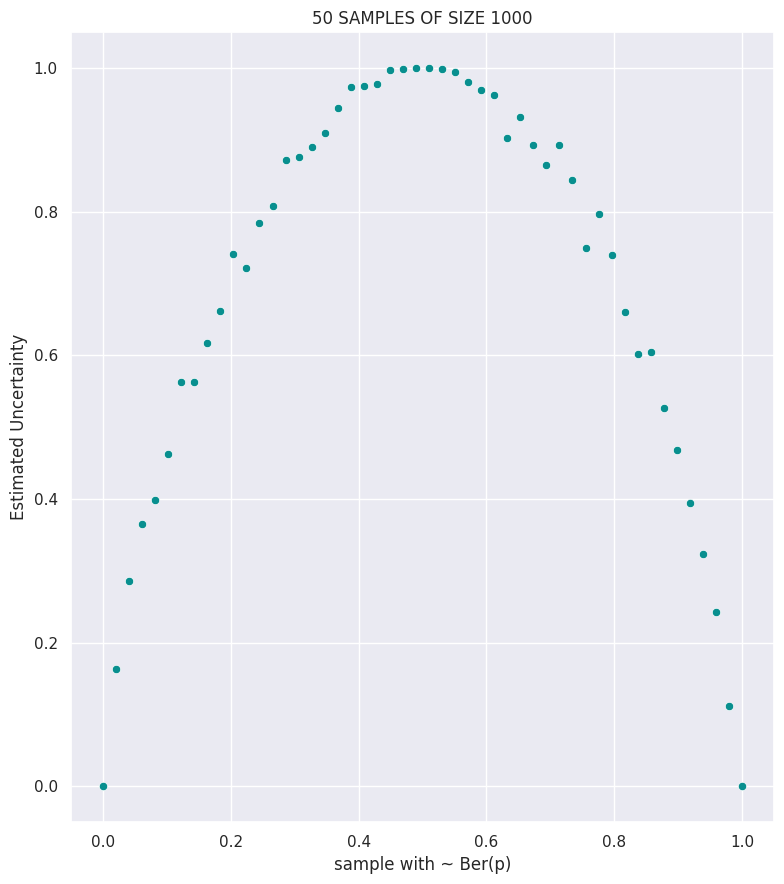

In [13]:
if __name__ == '__main__':
    main()